<a href="https://colab.research.google.com/github/JencyCS/DataScience/blob/main/Logistic_Regression_and_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sheth L.U.J and Sir M.V. College
Jency Nadar T095

Logistic regression

In [ ]:
# Loading Data
#import pandas
import pandas as pd

# Define column names based on your dataset
col_names = [
    'gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
    'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
    'Stock_Market', 'Factor', 'Objective', 'Purpose', 'Duration',
    'Invest_Monitor', 'Expect', 'Avenue', 'What_are_your_savings_objectives?',
    'Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD', 'Source'
]

# Load dataset
finance_data = pd.read_csv("Finance_data.csv", header=0, names=col_names)

# Display the first few rows of the dataset
print(finance_data.head())


   gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
0  Female   34                Yes             1              2           5   
1  Female   23                Yes             4              3           2   
2    Male   30                Yes             3              6           4   
3    Male   22                Yes             2              1           3   
4  Female   24                 No             2              1           3   

   Government_Bonds  Fixed_Deposits  PPF  Gold  ...           Duration  \
0                 3               7    6     4  ...          1-3 years   
1                 1               5    6     7  ...  More than 5 years   
2                 2               5    1     7  ...          3-5 years   
3                 7               6    4     5  ...   Less than 1 year   
4                 6               4    5     7  ...   Less than 1 year   

  Invest_Monitor   Expect       Avenue What_are_your_savings_objectives?  \
0        M

In [ ]:
feature_cols = [
    'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
    'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF',
    'Gold', 'Stock_Market', 'Factor', 'Objective', 'Purpose',
    'Duration', 'Invest_Monitor', 'Expect', 'Avenue'
]

target_col = 'What_are_your_savings_objectives?'

X = finance_data[feature_cols]
y = finance_data[target_col]

print("Features (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())


Features (X):
   age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
0   34                Yes             1              2           5   
1   23                Yes             4              3           2   
2   30                Yes             3              6           4   
3   22                Yes             2              1           3   
4   24                 No             2              1           3   

   Government_Bonds  Fixed_Deposits  PPF  Gold Stock_Market          Factor  \
0                 3               7    6     4          Yes         Returns   
1                 1               5    6     7           No  Locking Period   
2                 2               5    1     7          Yes         Returns   
3                 7               6    4     5          Yes         Returns   
4                 6               4    5     7           No         Returns   

              Objective          Purpose           Duration Invest_Monitor  \
0  Capital A

In [ ]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Displaying the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training set shape: (30, 17)
Testing set shape: (10, 17)
Training target shape: (30,)
Testing target shape: (10,)


Confusion Matrix:
 [[85  8]
 [21 86]]
Accuracy: 0.855
Precision: 0.9148936170212766
Recall: 0.8037383177570093


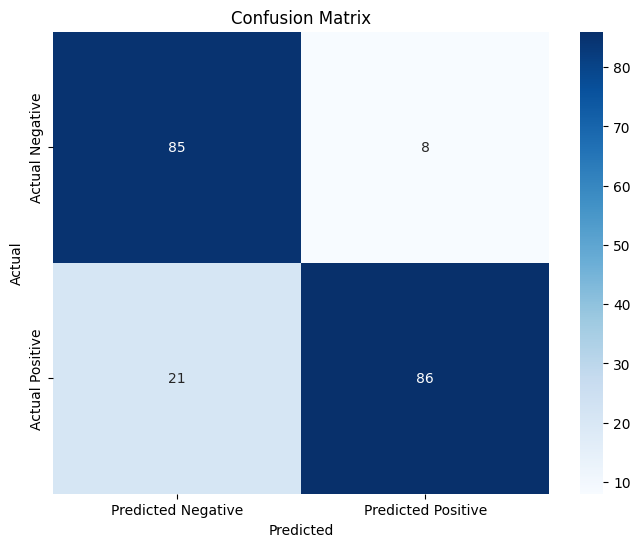

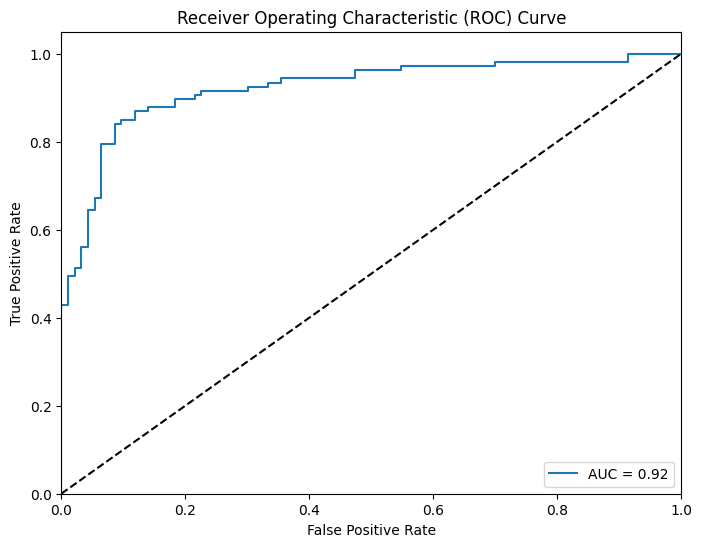

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment and specify your dataset
# X = df.drop('target_column', axis=1)  # Replace 'target_column' with your target variable
# y = df['target_column']

# For demonstration, let's create a synthetic dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)

# Evaluation Metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="AUC = " + str(round(auc, 2)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Decision Tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported ")

Libraries imported 


In [ ]:
df = pd.read_csv('Finance_data.csv')
print("dataframe of dataset created")

dataframe of dataset created


In [ ]:
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [ ]:
df= df[['Mutual_Funds','Equity_Market','Debentures']]

In [ ]:
#finding NULL instances
df.isnull().sum()

,0
Mutual_Funds,0
Equity_Market,0
Debentures,0


In [ ]:
df.groupby('Debentures')['Mutual_Funds'].mean()

,Mutual_Funds
Debentures,
1,4.000000
2,4.000000
3,2.500000
4,4.333333
5,2.333333
6,2.250000
7,2.300000


In [ ]:
# Substituting NULL with MEAN values
df['Debentures']=df.groupby("Mutual_Funds")['Debentures'].transform(lambda x: x.fillna(x.mean()))

Changing category column to numerical column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Mutual_Funds'] = le.fit_transform(df.Mutual_Funds)

In [ ]:
df.head()

,Mutual_Funds,Equity_Market,Debentures
0,0,2,5
1,3,3,2
2,2,6,4
3,1,1,3
4,1,1,3


In [ ]:
# X- Features  y- Label
X = df[['Mutual_Funds','Equity_Market']]
y= df['Debentures']

# Doing train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Training the model


In [ ]:
#https://scikit-learn.org/stable/modules/tree.html#classification
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

# Checking accuracy of testing dataset

In [ ]:
from sklearn.metrics import accuracy_score
import math
predictions_test=clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test, predictions_test)*100)

Accuracy :  66.66666666666666


# Checking accuracy of training dataset

In [ ]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

0.7857142857142857

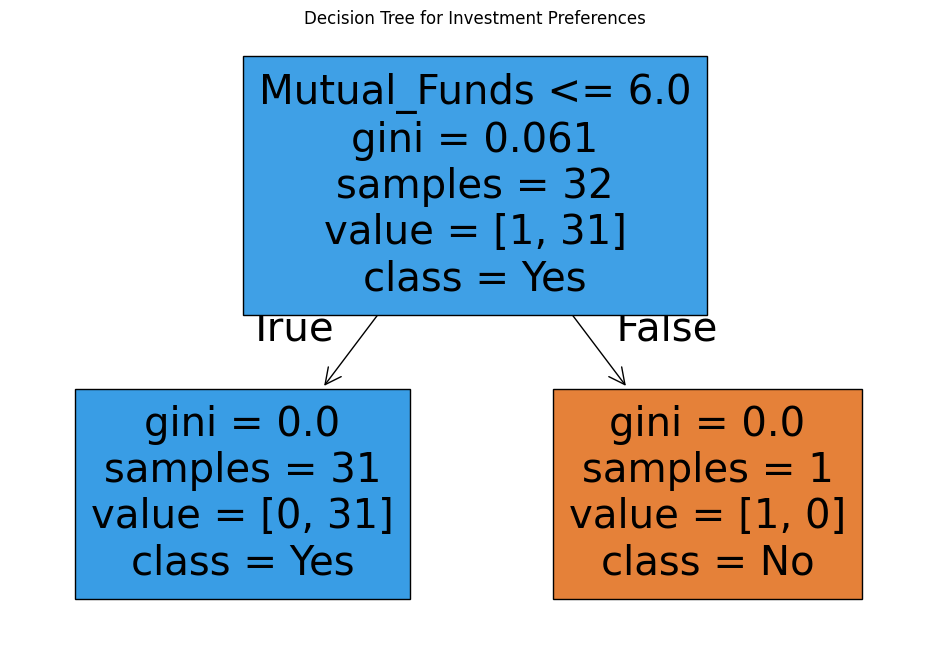

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Finance_data.csv')

# Select relevant columns
features = data[['Mutual_Funds', 'Equity_Market', 'Debentures']]
target = data['Investment_Avenues']  # Assuming this is the target variable

# Encode categorical variables
features_encoded = pd.get_dummies(features, drop_first=True)
target_encoded = target.map({'Yes': 1, 'No': 0})  # Assuming binary classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target_encoded, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=features_encoded.columns, class_names=['No', 'Yes'])
plt.title('Decision Tree for Investment Preferences')
plt.show()
